In [1]:
def getConfidence_nonconvex(k,N,beta): 
 # k= Number of support scenarios
 # N= Number of scenarios in the dataset
 # beta= s small confidence parameter (beta=10^-8 means high confidence level)

    if k == N:
        epsilon=1
    elif k < N:
    #  this is numerically  for high N and k
    #   epsilon=1-(beta./(N.*nchoosek(N,k))).^(1/(N-k));
    #  This expansion is slower but guarantees stability (and numerical accuracy)
        E = (beta*k/N**2)**(1/(N-k))  
        for l in range(k-1):
            Temp = (1/((N-l)/(k-l)))**(1/(N-k))
            E = E*Temp    
            epsilon = 1-E
   
    elif k > N:
        print('ERROR: numbber of support constraints k should be k<=N') 
    return epsilon

# EXAMPLE HOW TO USE
#N=10**5 # number of samples 
#sn=300 # number of support constraints
#beta=10**-8 # confidence parameter (small beta means almost cerainty)
#getConfidence_nonconvex(sn,N,beta)


0.020477063634298243

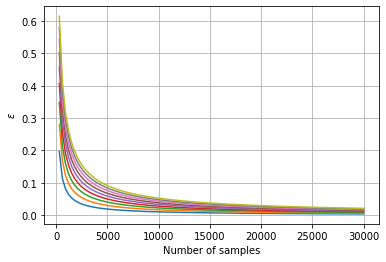

In [6]:
import matplotlib.pyplot as plt
import numpy as np
beta=10**-8 
SN=100
Nrange=np.linspace(sn,sn*100,100)
SNrange=range(10,SN,10) 
for k in SNrange:
    Epsilon = [getConfidence_nonconvex(k,i,beta) for i in Nrange] 
    plt.plot(Nrange,Epsilon)   
    
plt.xlabel('Number of samples')
plt.ylabel('$\epsilon$')
plt.grid(True) 